## Understanding Business Problem

### 1. Project Title
- Predicting Attorney Involvement in Insurance Claims Using Machine Learning.
### 2. Business Context
- In the insurance industry, claims involving attorneys tend to increase costs and prolong the settlement process. Identifying factors that contribute to attorney involvement can help insurers take preventive measures, improve customer communication, and streamline claim resolution processes.
- By using Machine Learning, we aim to predict the likelihood of attorney involvement in an insurance claim based on key factors such as claimant demographics, seatbelt usage, insurance coverage, and claim loss.

## Data Collection

#### Import Necessary Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,roc_auc_score, classification_report, roc_curve
from pickle import dump, load

#### Import/collect Data

In [2]:
claimants_data = pd.read_csv('claimants.csv')

#### Initial Analysis

In [3]:
claimants_data.shape

(1340, 7)

In [4]:
claimants_data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [5]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
claimants_data.describe(include='all')

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [8]:
claimants_data.groupby('SEATBELT').count()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,CLMAGE,LOSS
SEATBELT,,,,,,
0.0,1270,1270,1261,1256,1094,1270
1.0,22,22,22,22,20,22


## Data Preparation

In [14]:
claimants_data.dropna(axis=0,inplace=True)

In [15]:
claimants_data.shape

(1096, 7)

In [16]:
del claimants_data['CASENUM']

In [17]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

## Model Building & Training

#### Steps in Model Building
- 1. Separate Dependant & Independant Features
- 2. Split data into train & test
- 3. Initialize the model, train

In [18]:
X = claimants_data.drop('ATTORNEY',axis=1)
y = claimants_data['ATTORNEY']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [21]:
x_train.shape,y_train.shape

((876, 5), (876,))

In [22]:
x_test.shape,y_test.shape

((220, 5), (220,))

##### Model Training

In [24]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

## Model Testing & Evaluation

#### Model Testing

In [26]:
y_pred = logistic_model.predict(x_test)

#### Model Evaluation

In [28]:
accuracy_score(y_test,y_pred)

0.6863636363636364

In [29]:
confusion_matrix(y_test,y_pred)

array([[72, 42],
       [27, 79]])

In [30]:
# TP + TN/TP+TN+FP+FN

(72+79)/(72+79+27+42)

0.6863636363636364

In [31]:
precision_score(y_test,y_pred)

0.6528925619834711

In [35]:
# TP/TP+FP

72/(72+27)

0.7272727272727273

In [36]:
recall_score(y_test,y_pred)

0.7452830188679245

In [37]:
roc_auc_score(y_test,y_pred)

np.float64(0.6884309831181727)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       114
           1       0.65      0.75      0.70       106

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.69      0.69      0.69       220



In [43]:
logistic_model.predict_proba(X)[:,1]

array([2.55270718e-06, 4.79135964e-01, 5.91333968e-01, ...,
       7.38881060e-01, 2.60418914e-01, 6.79291443e-01])

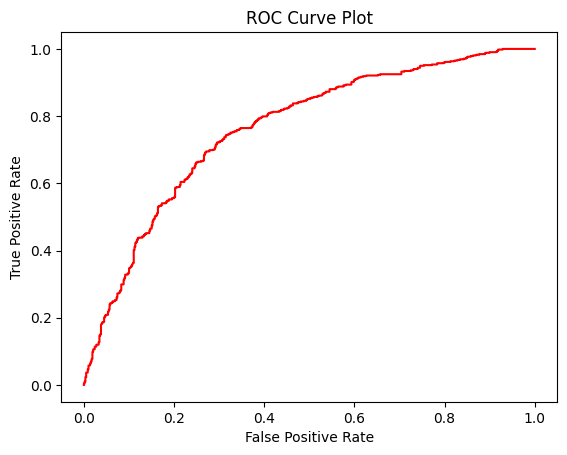

In [45]:
### ROC Curve

fpr, tpr, thresholds = roc_curve(y,logistic_model.predict_proba(X)[:,1])

plt.plot(fpr,tpr, color='red',label='logit model')
plt.title('ROC Curve Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Model deployment

In [47]:
dump(logistic_model,open('logistic_model.pkl','wb'))

In [49]:
logic_model = load(open('logistic_model.pkl','rb'))

In [50]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [51]:
sample_data = pd.DataFrame({'CLMSEX':[0],'CLMINSUR':[1.0],'SEATBELT':[1.0],'CLMAGE':[60.0],'LOSS':[30.0]})

In [52]:
logic_model.predict(sample_data)

array([0])

In [56]:
logic_model.predict_proba((sample_data)[:])

array([[9.99989438e-01, 1.05618070e-05]])

## Task - Use Transformation Technique to Increase Model Accuracy